Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [5]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

In [6]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [7]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [8]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Cancer Detection/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Cancer Detection/Test')

In [9]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [10]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [11]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [12]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

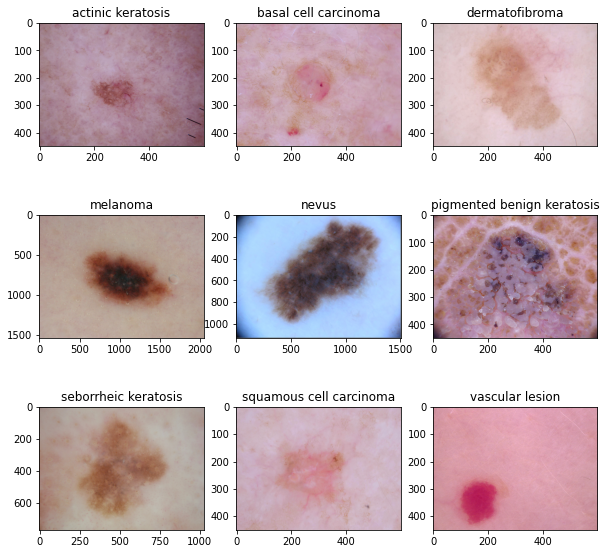

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [17]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [19]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 257s 1s/step - loss: 2.0578 - accuracy: 0.1992 - val_loss: 1.9472 - val_accuracy: 0.2215
Epoch 2/30
56/56 [==============================] - 4s 76ms/step - loss: 1.9482 - accuracy: 0.2427 - val_loss: 1.9279 - val_accuracy: 0.2819
Epoch 3/30
56/56 [==============================] - 4s 75ms/step - loss: 1.8524 - accuracy: 0.2924 - val_loss: 1.8368 - val_accuracy: 0.3020
Epoch 4/30
56/56 [==============================] - 4s 76ms/step - loss: 1.8168 - accuracy: 0.3371 - val_loss: 1.6789 - val_accuracy: 0.4072
Epoch 5/30
56/56 [==============================] - 4s 76ms/step - loss: 1.7198 - accuracy: 0.3750 - val_loss: 1.7274 - val_accuracy: 0.4049
Epoch 6/30
56/56 [==============================] - 4s 76ms/step - loss: 1.6266 - accuracy: 0.4196 - val_loss: 1.5760 - val_accuracy: 0.4318
Epoch 7/30
56/56 [==============================] - 4s 76ms/step - loss: 1.5594 - accuracy: 0.4258 - val_loss: 1.5444 - val_accuracy: 0.4519
Epoch 8/30
56

In [20]:
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


### Visualizing training results

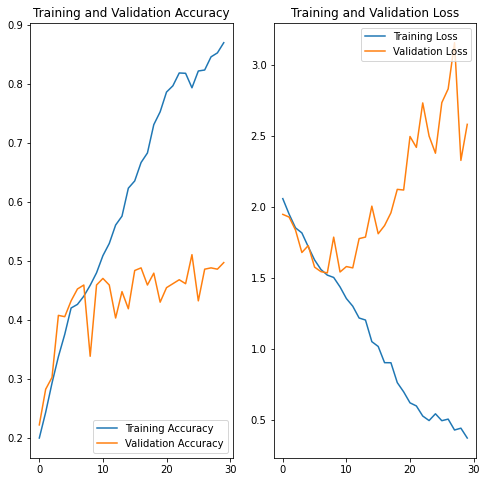

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



**Finding on the first base model**

- The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch

- The accuracy is just around 75-80% because there are enough features to remember the pattern.

- But again, it's too early to comment on the overfitting & underfitting debate 



In [22]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

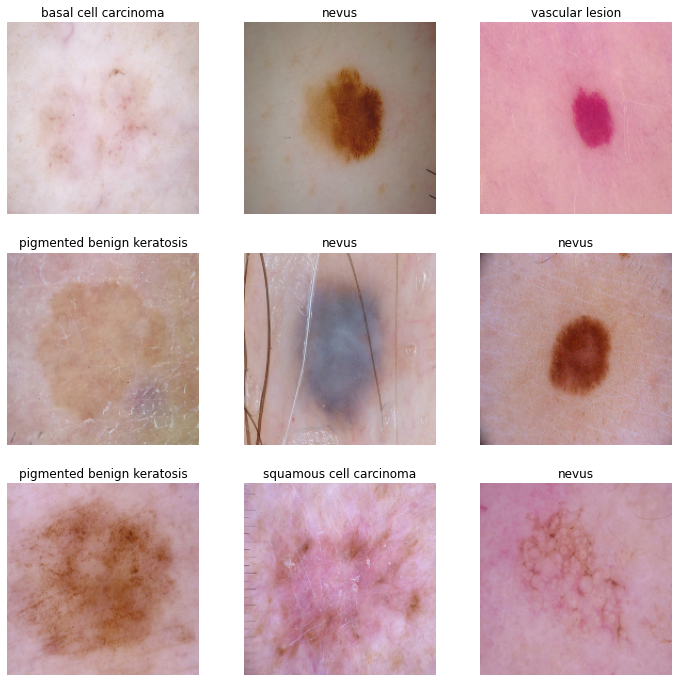

In [23]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [24]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [25]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Training the model

In [26]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 91ms/step - loss: 2.0691 - accuracy: 0.1925 - val_loss: 2.0686 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 89ms/step - loss: 2.0343 - accuracy: 0.2015 - val_loss: 2.0323 - val_accuracy: 0.2036
Epoch 3/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0321 - accuracy: 0.1931 - val_loss: 2.0193 - val_accuracy: 0.2103
Epoch 4/20
56/56 [==============================] - 5s 88ms/step - loss: 2.0221 - accuracy: 0.2065 - val_loss: 2.0290 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 5s 85ms/step - loss: 2.0231 - accuracy: 0.1936 - val_loss: 2.0262 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0160 - accuracy: 0.2009 - val_loss: 2.0180 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0189 - accuracy: 0.1920 - val_loss: 2.0246 - val_accuracy: 0.2058
Epoch 8/20
56

### Visualizing the results

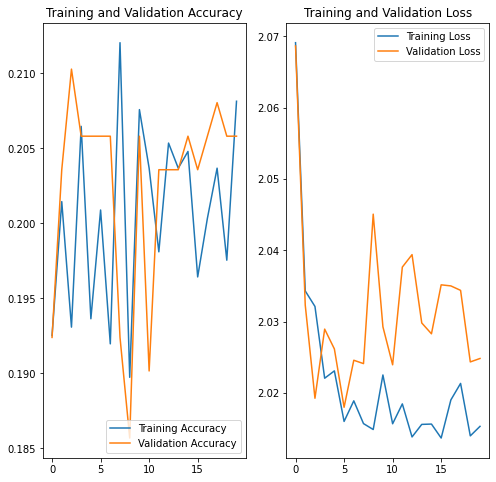

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Finding from Second Model**

- There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation 

- We can increase the epochs to increase the accuracy so it's too early for judgement 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [28]:
##
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
path_list=[]
lesion_list=[]
for i in class_names:      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

Path  \
0              /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0027447.jpg   
1              /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029141.jpg   
2              /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026575.jpg   
3              /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029133.jpg   
4              /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029460.jpg   
5              /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029900.jpg   
6              /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028190.jpg   
7              /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0027802.jpg   
8              /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0025957.jpg   
9              /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0027615.jpg   
10             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0027580.jpg   
11             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026149.jpg   
12             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029041.jpg   
13             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026194.jpg   
14             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028990.jpg   
15             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028370.jpg   
16             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029830.jpg   
17             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0027668.jpg   
18             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028076.jpg   
19             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028941.jpg   
20             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029500.jpg   
21             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029827.jpg   
22             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026709.jpg   
23             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0025953.jpg   
24             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026625.jpg   
25             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028393.jpg   
26             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026848.jpg   
27             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028517.jpg   
28             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028063.jpg   
29             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028820.jpg   
30             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0030491.jpg   
31             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0030242.jpg   
32             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026702.jpg   
33             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0025803.jpg   
34             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0030344.jpg   
35             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026525.jpg   
36             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0030142.jpg   
37             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0025780.jpg   
38             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026212.jpg   
39             /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026040

<BarContainer object of 9 artists>

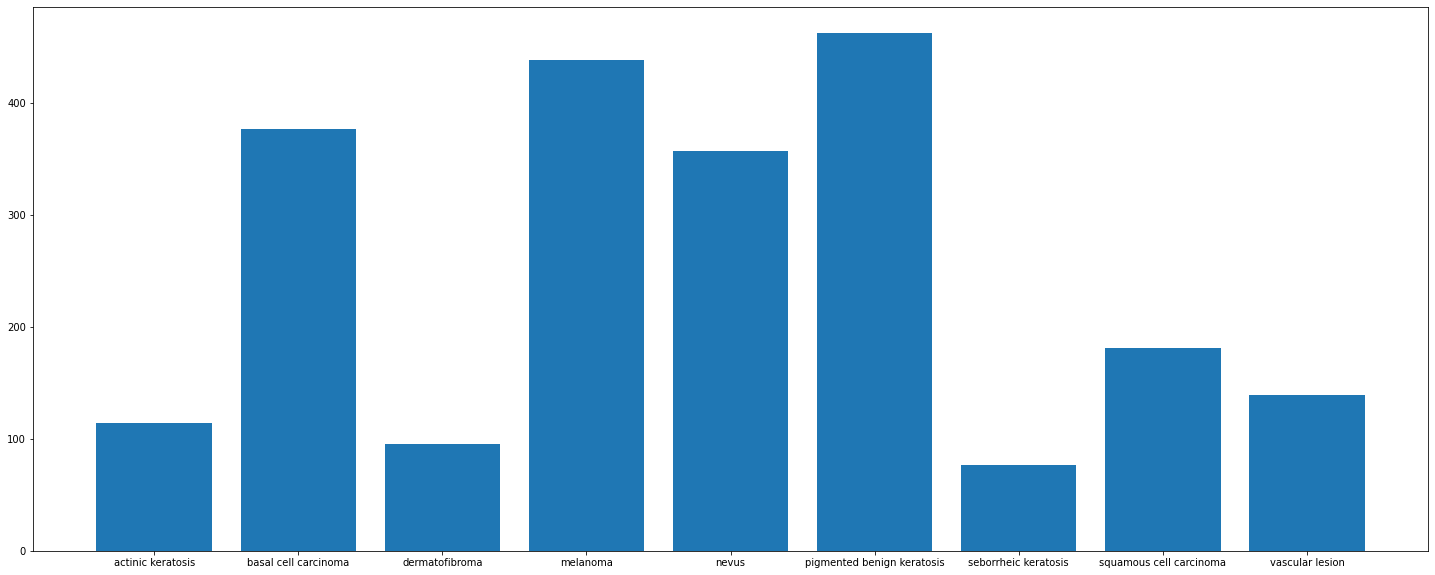

In [29]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Answer-1 :- **seborrheic keratosis** has least number of samples

Answer-2:- **actinic keratosis and dermatofibroma** have proportionate number of classes.
**melanoma and pigmented benign keratosis** have proportionate number of classes

In [30]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [31]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [32]:
#path_to_training_dataset=pathlib.Path("/content/gdrive/MyDrive/cancer detection/Train")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(data_dir_train /i,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5530421710>: 100%|██████████| 500/500 [00:20<00:00, 24.21 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Cancer Detection/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F55308F3E50>: 100%|██████████| 500/500 [00:22<00:00, 22.60 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Cancer Detection/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5530430850>: 100%|██████████| 500/500 [00:22<00:00, 22.18 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Cancer Detection/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F552A5C0390>: 100%|██████████| 500/500 [01:30<00:00,  5.54 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Cancer Detection/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F553098B150>: 100%|██████████| 500/500 [01:26<00:00,  5.76 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Cancer Detection/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F552A59A2D0>: 100%|██████████| 500/500 [00:18<00:00, 26.88 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Cancer Detection/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F552F2839D0>: 100%|██████████| 500/500 [00:46<00:00, 10.85 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Cancer Detection/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F553097FA10>: 100%|██████████| 500/500 [00:17<00:00, 28.03 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Cancer Detection/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5530471A50>: 100%|██████████| 500/500 [00:17<00:00, 27.79 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [33]:
image_count_train1 = len(list(data_dir_train.glob('**/*.jpg')))
print(image_count_train1)


6739


In [34]:
##
import glob
from pathlib import Path

# search all files inside a specific folder
# *.* means file name with any extension
for i in class_names:
  for path in Path(data_dir_train /i).rglob('*.jpg'):
    path_list.append(path.resolve())    
    lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

Path  \
0                                                                                                  /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0027447.jpg   
1                                                                                                  /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029141.jpg   
2                                                                                                  /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026575.jpg   
3                                                                                                  /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029133.jpg   
4                                                                                                  /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029460.jpg   
5                                                                                                  /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029900.jpg   
6                                                                                                  /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028190.jpg   
7                                                                                                  /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0027802.jpg   
8                                                                                                  /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0025957.jpg   
9                                                                                                  /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0027615.jpg   
10                                                                                                 /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0027580.jpg   
11                                                                                                 /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026149.jpg   
12                                                                                                 /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029041.jpg   
13                                                                                                 /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0026194.jpg   
14                                                                                                 /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028990.jpg   
15                                                                                                 /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028370.jpg   
16                                                                                                 /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029830.jpg   
17                                                                                                 /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0027668.jpg   
18                                                                                                 /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028076.jpg   
19                                                                                                 /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0028941.jpg   
20                                                                                                 /content/gdrive/MyDrive/Cancer Detection/Train/actinic keratosis/ISIC_0029500.jpg   
21                                                                                                 /content/gdrive/MyDrive/Cance

### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
new_df['Label'].value_counts()

pigmented benign keratosis    1424
melanoma                      1376
basal cell carcinoma          1252
nevus                         1214
squamous cell carcinoma        862
vascular lesion                778
actinic keratosis              728
dermatofibroma                 690
seborrheic keratosis           654
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [36]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [39]:
image_count_train1 = len(list(data_dir_train.glob('**/*.jpg')))
print(image_count_train1)

6739


In [41]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [43]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
BatchNormalization()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [44]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [45]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 43s 249ms/step - loss: 2.1881 - accuracy: 0.1404 - val_loss: 2.2007 - val_accuracy: 0.1403
Epoch 2/50
169/169 [==============================] - 37s 212ms/step - loss: 2.1848 - accuracy: 0.1495 - val_loss: 2.1950 - val_accuracy: 0.1403
Epoch 3/50
169/169 [==============================] - 33s 188ms/step - loss: 2.1756 - accuracy: 0.1430 - val_loss: 2.1826 - val_accuracy: 0.1418
Epoch 4/50
169/169 [==============================] - 33s 189ms/step - loss: 2.1911 - accuracy: 0.1422 - val_loss: 2.1928 - val_accuracy: 0.1403
Epoch 5/50
169/169 [==============================] - 33s 190ms/step - loss: 2.1671 - accuracy: 0.1413 - val_loss: 2.1675 - val_accuracy: 0.1529
Epoch 6/50
169/169 [==============================] - 33s 192ms/step - loss: 2.1556 - accuracy: 0.1558 - val_loss: 2.1718 - val_accuracy: 0.1477
Epoch 7/50
169/169 [==============================] - 33s 191ms/step - loss: 2.1600 - accuracy: 0.1465 - val_loss: 2.1713 - val_ac

#### **Todo:**  Visualize the model results

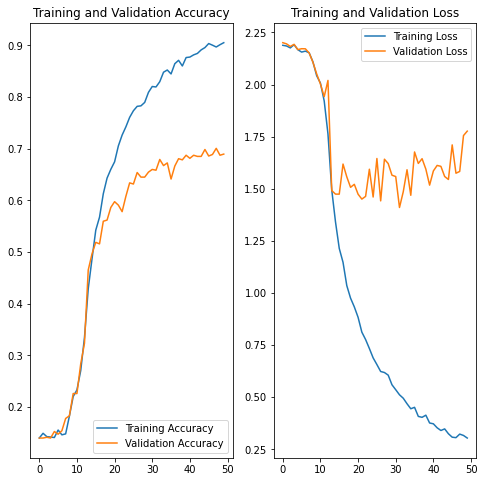

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Accuracy on training data has increased by using Augmentor library

- Model is still overfitting

- The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.

- The Model can be further improved by tuning the hyperparameter